In [2]:
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa
fsensor="/scratch/ICE-CUBE/sensor_geometry.csv"
fbatch={'1':"/scratch/ICE-CUBE/batch_1.parquet"}
fmeta="/scratch/ICE-CUBE/train_meta.parquet"
sensorgeom = pd.read_csv(fsensor).set_index("sensor_id").to_dict()
batch= pd.read_parquet(fbatch['1']).query("(event_id%100==0) & (auxiliary==False)")
metapq=ParquetFile(fmeta)
first_ten_rows = next(metapq.iter_batches(batch_size = 185806))

meta=pa.Table.from_batches([first_ten_rows]).to_pandas() 
#Map x,y,z to sensor_id in batch

def getx(sensorid):
    return sensorgeom['x'][sensorid]
def gety(sensorid):
    return sensorgeom['y'][sensorid]
def getz(sensorid):
    return sensorgeom['z'][sensorid]

batch['x']=batch['sensor_id'].apply(getx)
batch['y']=batch['sensor_id'].apply(gety)
batch['z']=batch['sensor_id'].apply(getz)


<IPython.core.display.Javascript object>


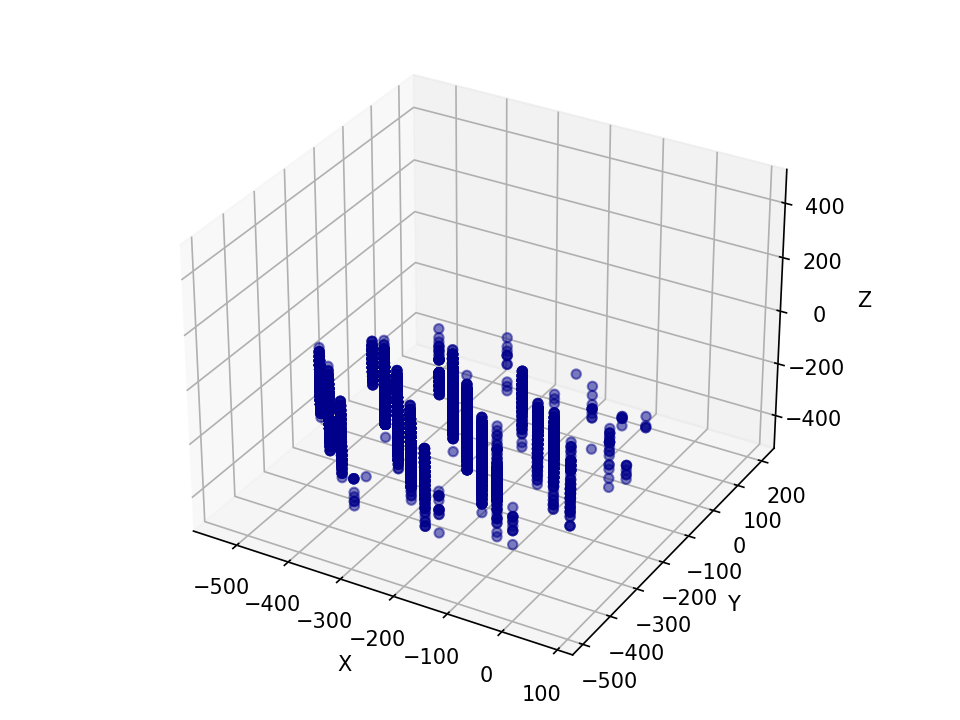

In [10]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation

df = batch.loc[49000]


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
sc = ax.scatter([],[],[], c='darkblue', alpha=0.5)

def update(i):
    sc._offsets3d = (df.x.values[:i], df.y.values[:i], df.z.values[:i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(df.x.min(),df.x.max())
ax.set_ylim(df.y.min(),df.y.max())
ax.set_zlim(df.z.min(),df.z.max())

ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(df), interval=1)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


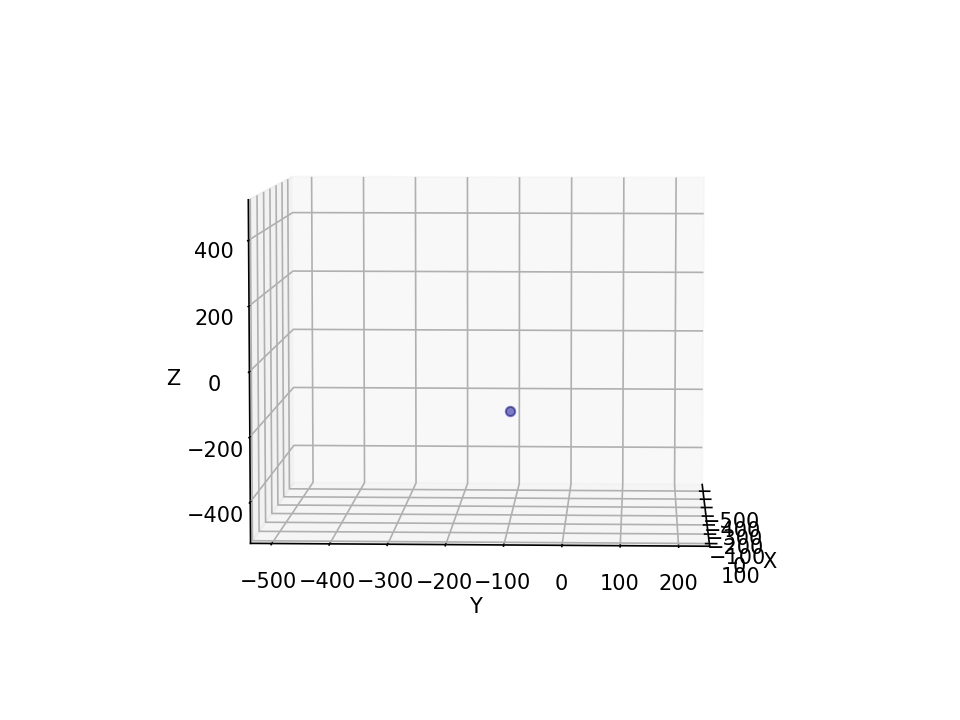

In [9]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation

df = batch.loc[49000]


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
sc = ax.scatter([],[],[], c='darkblue', alpha=0.5)

def update(i):
    sc._offsets3d = (df.x.values[i:i+1], df.y.values[i:i+1], df.z.values[i:i+1])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(df.x.min(),df.x.max())
ax.set_ylim(df.y.min(),df.y.max())
ax.set_zlim(df.z.min(),df.z.max())

ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(df), interval=1)

plt.tight_layout()
plt.show()